# **Image Denoising and Edge Detection with Python (cv2)**
---

## **Overview**
Image denoising and edge detection are essential techniques in image processing, often used to enhance image quality and analyze features for further processing. This report covers a sequence of denoising techniques and concludes with an edge detection method using OpenCV. Each section includes explanations of the methods applied, parameter variations, and their significance in refining image details and noise levels.

## **1. Importing Required Libraries**
- OpenCV (`cv2`): A widely-used library for computer vision, used here for denoising, blurring, and edge detection techniques.
- NumPy (`np`): Provides array support, used for kernel manipulation and custom filter creation.
- Matplotlib (`plt`): Used for displaying images in a notebook or interactive Python environment.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Image Loading and Display**
- The image is loaded using OpenCV's `cv2.imread()` function, which reads an image from the specified path. We use `plt.imshow()` from Matplotlib to display it, making it compatible with notebook environments.

**Parameters**
- `cv2.imread(filepath, flag)`: Reads an image from the specified file path.
  - `flag=1`: Loads the image in color.
  - `flag=0`: Loads the image in grayscale.
  - `flag=-1`: Loads the image including the alpha channel (transparency).

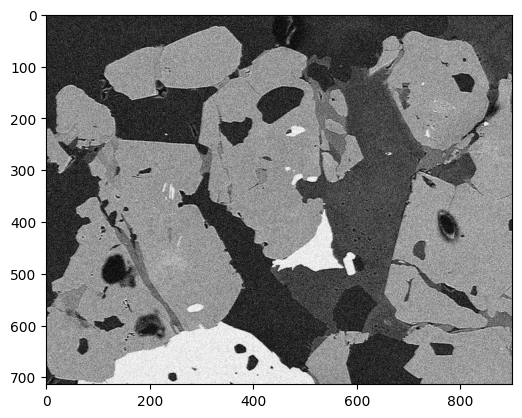

In [3]:
img = cv2.imread("/content/image.jpg", 1)
plt.imshow(img);

## **3. Custom Blurring with 2D Convolution Filter**
- Applies a custom 3x3 averaging filter that smooths the image by convolving each pixel with its neighboring pixels, resulting in reduced noise and a more uniform appearance.

**Parameters**:
- kernel: Defines a 3x3 matrix with each value as 1/9, creating an averaging filter.
- `cv2.filter2D(src, ddepth, kernel)`: Applies a custom linear filter to an image.
  - `src`: Source image.
  - `ddepth=-1`: Keeps the output image depth the same as the source.
  - `kernel`: The filter matrix.

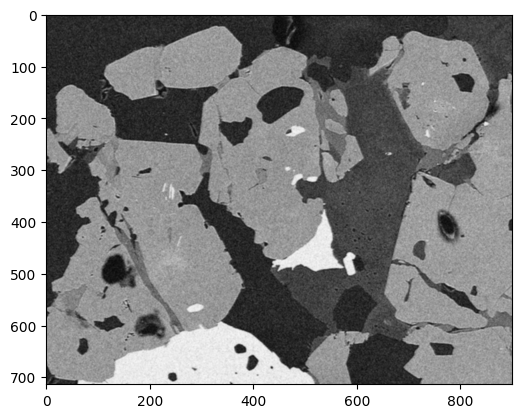

In [13]:
kernel = np.ones((3, 3), np.float32) / 9
custom_blurred_img = cv2.filter2D(img, -1, kernel)
plt.imshow(custom_blurred_img);

## **4. Simple Averaging Blur**
- Applies a basic averaging filter that smooths out the image by averaging the values of neighboring pixels in a specified kernel size, reducing noise.

**Parameters**:
- `cv2.blur(src, ksize)`: Blurs an image by averaging pixels within a specified kernel size.
  - `ksize=(3, 3)`: Defines the width and height of the kernel.

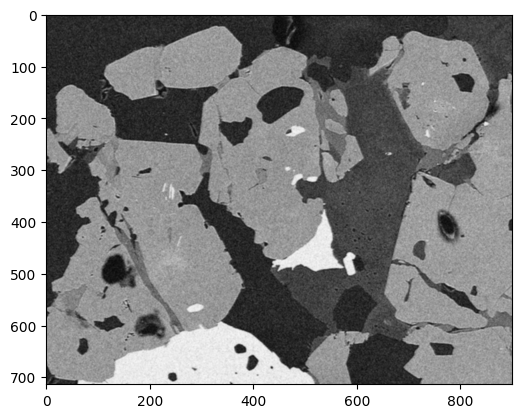

In [10]:
blurred_img = cv2.blur(img, (3, 3), 0)
plt.imshow(blurred_img);

## **5. Gaussian Blurring**
- Reduces image noise and detail using Gaussian blurring, where the filter kernel follows a Gaussian distribution. This technique provides natural-looking smoothing effects.

**Parameters**:
- `cv2.GaussianBlur(src, ksize, sigmaX)`: Applies Gaussian blurring on the image.
  - `ksize=(3, 3)`: Specifies the kernel size.
  - `sigmaX=0`: Allows OpenCV to compute sigmaX based on ksize.

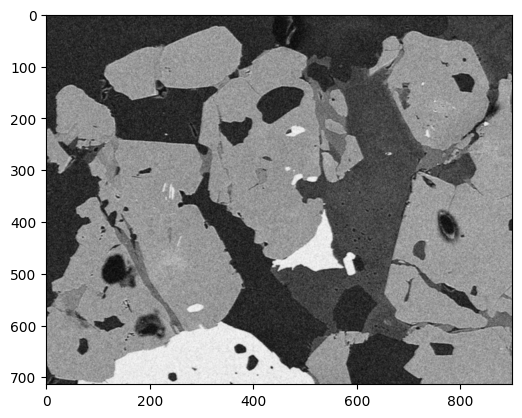

In [11]:
gaussian_blur_img = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(gaussian_blur_img);

## **6. Median Blurring**
- Applies median blurring, especially effective for removing salt-and-pepper noise by replacing each pixel with the median of neighboring pixels.

**Parameters**:
- `cv2.medianBlur(src, ksize)`: Blurs the image by computing the median of pixels in the defined area.
  - `ksize=3`: Specifies the aperture size (must be an odd number).

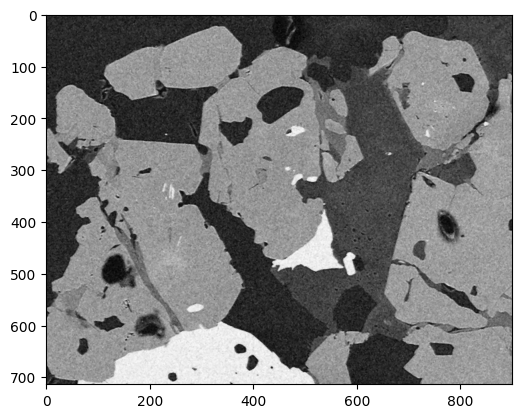

In [12]:
median_blurred_img = cv2.medianBlur(img, 3)
plt.imshow(median_blurred_img);

## **7. Bilateral Filtering**
- Applies bilateral filtering, preserving edges while smoothing the image. This filter is particularly useful for facial images or surfaces with clear edges.

**Parameters**:
- `cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)`: Applies a bilateral filter to the image.
  - `d=9`: Diameter of each pixel neighborhood.
  - `sigmaColor=75`: Controls the intensity difference between pixels to be considered for filtering.
  - `sigmaSpace=75`: Determines the spatial distance for neighboring pixels.

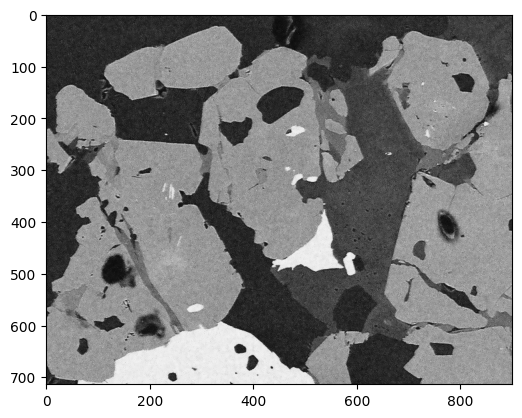

In [14]:
bilateral_blurred_img = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral_blurred_img);

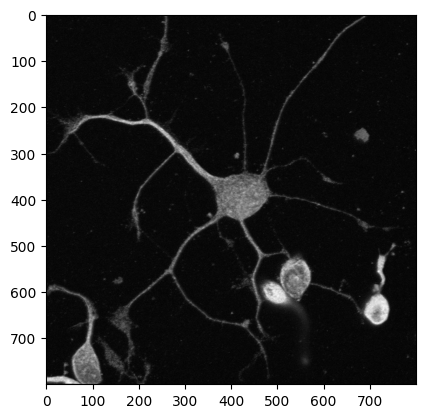

In [17]:
neuron_img = cv2.imread("/content/Neuron.jpg", 0)
plt.imshow(neuron_img, cmap="gray");

## **8. Edge Detection Using Canny Algorithm**
- Detect edges in the image using the Canny edge detection algorithm, which identifies areas with rapid intensity change and marks them as edges.

**Parameters**:
- `cv2.Canny(image, threshold1, threshold2)`: Detects edges based on gradients.
  - `threshold1=100` and `threshold2=200`: Low and high thresholds for edge linking.

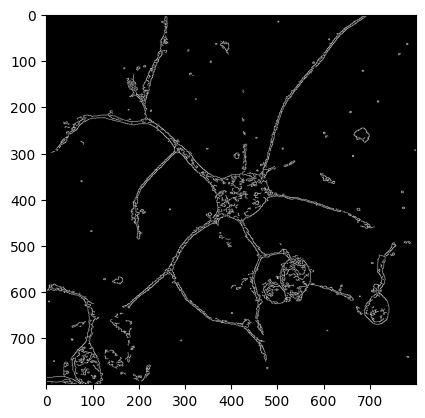

In [18]:
edges = cv2.Canny(neuron_img, 100, 200)
plt.imshow(edges, cmap="gray");